(1, 2)
0.0


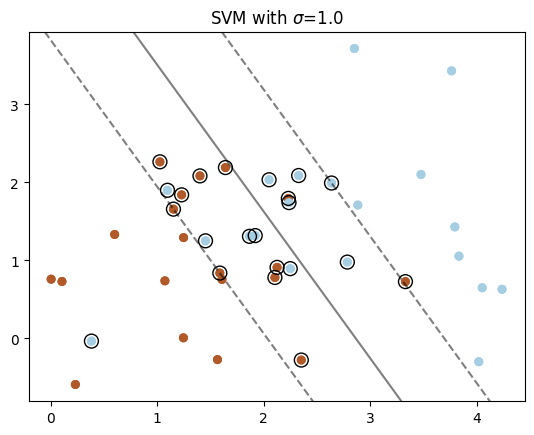

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 4 centroids of the gaussians
c=[[1,1],[2,1.5],[2,1],[3,1.5]]
N=10
sigma=0.04

# generate the X samples
X=np.zeros((N*len(c),2))
i = 0
for cent in c:
	for k in range(0,N):
		X[i,:]=cent+sigma*np.random.randn(1,2)
		i = i + 1
# group the first two and last two centroids
y=np.array([1]*(2*N)+[-1]*(2*N))

# scatter plot
l=plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Paired)
plt.title(r"Plot of data samples ($\sigma$={})".format(sigma))
plt.legend(*l.legend_elements())
image_format = 'png' # e.g. .png, .svg, etc.
image_name = "scatter_sig{}.{}".format(sigma,image_format)
plt.savefig(image_name, format=image_format, dpi=1200)
# plt.show()

# fit the model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

# calculates weights as w = SV*a
# where SV are the support vectors and a are the dual coefficents
# from the classifier machine
w = np.matmul(clf.dual_coef_,clf.support_vectors_)
print(w.shape)

# get b from the model
b = clf.intercept_[0]

# calculate yhat, using our weights and b intercept
yhat = np.sign(np.matmul(w,X.T)+b)[0]
# compare yhat with the machines predicted value for y
# print the norm of the difference between the two vectors
print(np.linalg.norm(clf.predict(X)-yhat))

#
# plot the decision function
#
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# the decision function determines where -1, 0, and 1 are
# on the plot.
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
# draws circles around the points in the previous scatter plot
# which are the support vector points
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title(r"SVM with $\sigma$={}".format(sigma))
image_name = "svm_sig{}.{}".format(sigma,image_format)
plt.savefig(image_name, format=image_format, dpi=1200)
# plt.show()


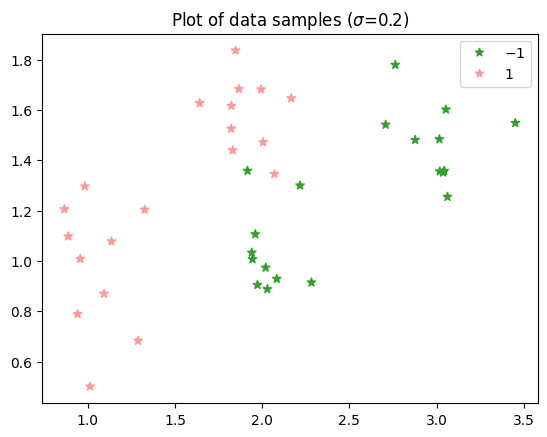

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 4 centroids of the gaussians
c=[[1,1],[2,1.5],[2,1],[3,1.5]]
N=10
sigma=0.2

# generate the X samples
X=np.zeros((N*len(c),2))
i = 0
for cent in c:
	for k in range(0,N):
		X[i,:]=cent+sigma*np.random.randn(1,2)
		i = i + 1
# group the first two and last two centroids
y=np.array([1]*(2*N)+[-1]*(2*N))

# scatter plot
l=plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker = '*', cmap=plt.cm.Paired, vmin=-5, vmax=10,)
plt.title(r"Plot of data samples ($\sigma$={})".format(sigma))
plt.legend(*l.legend_elements())
image_format = 'png' # e.g. .png, .svg, etc.
image_name = "scatter_sig{}.{}".format(sigma,image_format)
plt.savefig(image_name, format=image_format, dpi=1200)
# plt.show()

In [ ]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)
w = np.matmul(clf.dual_coef_,clf.support_vectors_)
print(w.shape)
b = clf.intercept_[0]
print(b)
yhat = np.sign(np.matmul(w,X.T)+b)[0]
print(yhat)
print(np.linalg.norm(clf.predict(X)-yhat))

(1, 2)
5.357800181527178
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]
0.0


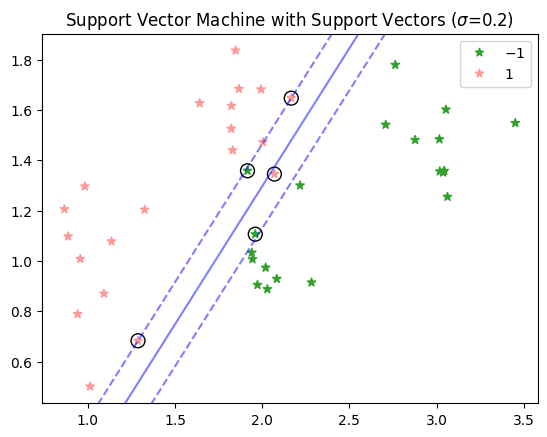

In [ ]:
l1 = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='*',cmap=plt.cm.Paired, vmin=-5, vmax=10)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# the decision function determines where -1, 0, and 1 are
# on the plot.
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title(r"Support Vector Machine with Support Vectors ($\sigma$={})".format(sigma))
image_name = "svm_sig{}.{}".format(sigma,image_format)
plt.savefig(image_name, format=image_format, dpi=1200)
plt.legend(*l1.legend_elements())
plt.show()


100%|██████████| 100/100 [00:23<00:00,  4.26it/s]


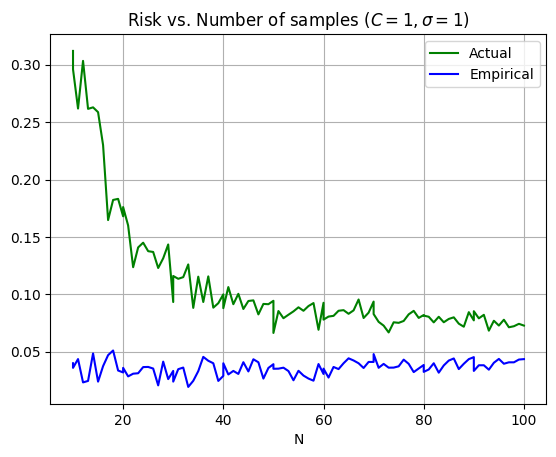

100%|██████████| 100/100 [04:12<00:00,  2.52s/it]


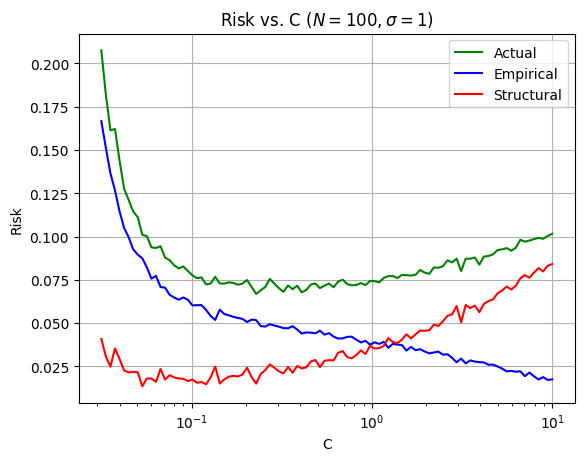

In [ ]:
import numpy as np
import numpy.matlib as matlib

def data(N,sigma):
    w=np.ones(10)/np.sqrt(10)
    w1=[1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)
    w2=[-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)
    x=np.zeros((4,10))
    x[1,:]=x[0,:]+sigma*w1
    x[2,:]=x[0,:]+sigma*w2
    x[3,:]=x[2,:]+sigma*w1
    X1=x+sigma*matlib.repmat(w,4,1)/2
    X2=x-sigma*matlib.repmat(w,4,1)/2
    X1=matlib.repmat(X1,2*N,1)
    X2=matlib.repmat(X2,2*N,1)
    X=np.concatenate((X1, X2), axis=0)
    Y=np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)
    Z=np.random.permutation(16*N)
    Z=Z[:N]
    X=X[Z,:]
    X=X+0.2*sigma*np.random.randn(N,10)
    Y=Y[Z]
    return X,Y

  # X, Y=data(100,1)

from tqdm import tqdm	# A Fast, Extensible Progress Bar for Python and CLI

def calcError(sigma, N, C, iterations):
	trainErr = 0
	testErr = 0
	for i in range(0,iterations):
		X,y = data(N,sigma)
		clf = svm.SVC(C=C, kernel='linear', gamma='scale').fit(X, y)
		e = clf.predict(X)-y
		trainErr = trainErr + np.sum(e*e)/len(y)
		Xtest,ytest = data(N,sigma)
		e = clf.predict(Xtest)-ytest
		testErr = testErr + np.sum(e*e)/len(ytest)

	return trainErr/iterations, testErr/iterations

sigma = 1

if True:
	C = 1
	N = np.linspace(10,100,100,dtype=int)
	etest = np.zeros(len(N))
	etrain = np.zeros(len(N))
	for k in tqdm(range(len(N))):
		etrain[k], etest[k] = calcError(sigma, N[k], C, 100)

	plt.plot(N,etest,label='Actual', color='green')
	plt.plot(N,etrain,label='Empirical', color='blue')
	plt.xlabel("N")
	plt.grid('both')
	plt.legend()
	plt.title(r'Risk vs. Number of samples ($C={},\sigma={}$)'.format(C,sigma))
	image_name = "risk_c{}_sig{}.{}".format(C,sigma,image_format)
	plt.savefig(image_name, format=image_format, dpi=1200)
	plt.show()

if True:
 N = 100
 C = 10**np.linspace(-1.5,1,100)
 etest = np.zeros(len(C))	# Actual risk
 etrain = np.zeros(len(C))		# Empirical risk
 for k in tqdm(range(len(C))):
		etrain[k], etest[k] = calcError(sigma, N, C[k], 1000)

 plt.plot(C,etest,label='Actual', color='green')
 plt.plot(C,etrain,label='Empirical', color='blue')
 plt.plot(C,(etest-etrain),label='Structural', color='red')
 plt.xscale(value="log")
 plt.xlabel("C")
 plt.grid('both')
 plt.legend()
 plt.xlabel('C')
 plt.ylabel('Risk')
 plt.title(r'Risk vs. C ($N={},\sigma={}$)'.format(N,sigma))
image_name = "struct_N{}_sig{}.{}".format(N,sigma,image_format)
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()